# 层次聚类方法实现与应用
避免划分聚类时需要提前指定类别数量的麻烦，在使用层次聚类方法时，可以根据创建树的方式分为两种情况：
* 自底向上层次聚类法：该方法的过程被称为「凝聚」Agglomerative，也就是把数据集中的每个元素看作是一个类别，然后进行迭代合并成为更大的类别，直到满足某个终止条件
* 自顶向下层次聚类法：该方法的过程被称为「分裂」Divisive，也就是凝聚的反向过程。首先，把数据集看作是一个类别，然后递归地划分为多个较小的子类，直到满足某个终止条件



## 自底向上
计算类别与类别之间的距离，有四种方法：
* 单连接：单连接的计算方式是根据两种类别之间最近的元素间距离作为两类别之间的距离
* 全连接：全连接的计算方式是根据两种类别之间最远的元素间距离作为两类别之间的距离
* 平均连接：平均连接的计算方式是依次计算两种类别之间两两元素间距离，并最终求得平均值作为两类别之间的距离
* 中心连接：先计算类别中心，再以中心连线作为两类别之间的距离

In [1]:
# Agglomerative聚类实现
# 生成示例数据
from sklearn import datasets

data = datasets.make_blobs(10, n_features=2, centers=2, random_state=10)
data

(array([[  6.04774884, -10.30504657],
        [  2.90159483,   5.42121526],
        [  4.1575017 ,   3.89627276],
        [  1.53636249,   5.11121453],
        [  3.88101257,  -9.59334486],
        [  1.70789903,   6.00435173],
        [  5.69192445,  -9.47641249],
        [  5.4307043 ,  -9.75956122],
        [  5.85943906,  -8.38192364],
        [  0.69523642,   3.23270535]]),
 array([0, 1, 1, 1, 0, 1, 0, 0, 0, 1]))

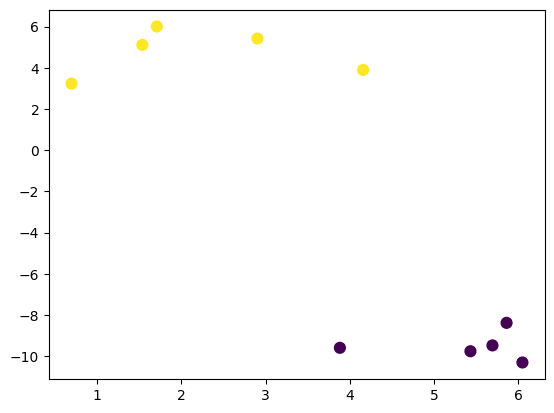

In [2]:
from matplotlib import pyplot as plt

%matplotlib inline

plt.scatter(data[0][:, 0], data[0][:, 1], c=data[1], s=60)

In [3]:
# 距离计算函数
import numpy as np

def euclidean_distance(a, b):
    """
    参数:
    a -- 数组 a
    b -- 数组 b

    返回:
    dist -- a, b 间欧式距离
    """
    # 欧式距离
    x = float(a[0]) - float(b[0])
    x = x * x
    y = float(a[1]) - float(b[1])
    y = y * y
    dist = round(np.sqrt(x + y), 2)
    return dist

In [4]:
# 使用中心连接
def agglomerative_clustering(data):
    # Agglomerative 聚类计算过程

    while len(data) > 1:
        print("☞ 第 {} 次迭代\n".format(10 - len(data) + 1))
        min_distance = float("inf")  # 设定初始距离为无穷大
        for i in range(len(data)):
            print("---")
            for j in range(i + 1, len(data)):
                distance = euclidean_distance(data[i], data[j])
                print("计算 {} 与 {} 距离为 {}".format(data[i], data[j], distance))
                if distance < min_distance:
                    min_distance = distance
                    min_ij = (i, j)
        i, j = min_ij  # 最近数据点序号
        data1 = data[i]
        data2 = data[j]
        data = np.delete(data, j, 0)  # 删除原数据
        data = np.delete(data, i, 0)  # 删除原数据
        b = np.atleast_2d(
            [(data1[0] + data2[0]) / 2, (data1[1] + data2[1]) / 2]
        )  # 计算两点新中心
        data = np.concatenate((data, b), axis=0)  # 将新数据点添加到迭代过程
        print("\n最近距离:{} & {} = {}, 合并后中心:{}\n".format(data1, data2, min_distance, b))

    return data

agglomerative_clustering(data[0])

☞ 第 1 次迭代

---
计算 [  6.04774884 -10.30504657] 与 [2.90159483 5.42121526] 距离为 16.04
计算 [  6.04774884 -10.30504657] 与 [4.1575017  3.89627276] 距离为 14.33
计算 [  6.04774884 -10.30504657] 与 [1.53636249 5.11121453] 距离为 16.06
计算 [  6.04774884 -10.30504657] 与 [ 3.88101257 -9.59334486] 距离为 2.28
计算 [  6.04774884 -10.30504657] 与 [1.70789903 6.00435173] 距离为 16.88
计算 [  6.04774884 -10.30504657] 与 [ 5.69192445 -9.47641249] 距离为 0.9
计算 [  6.04774884 -10.30504657] 与 [ 5.4307043  -9.75956122] 距离为 0.82
计算 [  6.04774884 -10.30504657] 与 [ 5.85943906 -8.38192364] 距离为 1.93
计算 [  6.04774884 -10.30504657] 与 [0.69523642 3.23270535] 距离为 14.56
---
计算 [2.90159483 5.42121526] 与 [4.1575017  3.89627276] 距离为 1.98
计算 [2.90159483 5.42121526] 与 [1.53636249 5.11121453] 距离为 1.4
计算 [2.90159483 5.42121526] 与 [ 3.88101257 -9.59334486] 距离为 15.05
计算 [2.90159483 5.42121526] 与 [1.70789903 6.00435173] 距离为 1.33
计算 [2.90159483 5.42121526] 与 [ 5.69192445 -9.47641249] 距离为 15.16
计算 [2.90159483 5.42121526] 与 [ 5.4307043  -9.75956122] 距离为 1

array([[ 3.40447914, -2.70986843]])

In [5]:
# 使用scikit-learn提供的Agglomerative聚类
'''
sklearn.cluster.AgglomerativeClustering(n_clusters=2, metric='euclidean', memory=None, connectivity=None, compute_full_tree='auto', linkage='ward', pooling_func=<function mean>)
    n_clusters: 表示最终要查找类别的数量，例如上面的 2 类
    metric: 有 euclidean（欧式距离）, l1（L1 范数）, l2（L2 范数）, manhattan（曼哈顿距离）等可选
    linkage: 连接方法：ward（单连接）, complete（全连接）, average（平均连接）可选
'''
from sklearn.cluster import AgglomerativeClustering

model = AgglomerativeClustering(n_clusters=2, metric="euclidean", linkage="average")
model.fit_predict(data[0])

array([1, 0, 0, 0, 1, 0, 1, 1, 1, 0])

## 自顶向下
自顶向下层次聚类法在实施过程中常常遇到一个问题，那就是如果两个样本在上一步聚类中被划分成不同的类别，那么即使这两个点距离非常近，后面也不会被放到一类中

所以在实际应用中，自顶向下层次聚类法没有自底而上的层次聚类法常用，这里也就不再进行实现了，了解其运行原理即可

## BIRCH聚类算法
BIRCH 的全称为 Balanced Iterative Reducing and Clustering using Hierarchies，直译过来就是「使用层次方法的平衡迭代规约和聚类」。BIRCH 最大的特点就是高效，可用于大型数据集的快速聚类
* CF聚类特征：一组样本的 CF 聚类特征定义为如下所示的三元组
$$
CF=<<N,LS,SS>>
$$
其中，N表示该 CF 中拥有的样本点的数量；LS表示该 CF 中拥有的样本点各特征维度的和向量；SS表示该 CF 中拥有的样本点各特征维度的平方和

CF 聚类特征本质上是定义类别（簇）的信息，并有效地对数据进行压缩
* CF聚类特征树

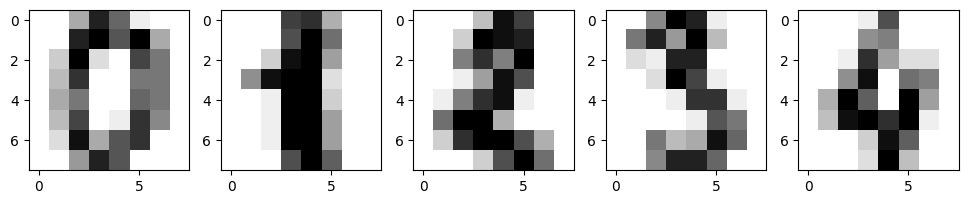

In [ ]:
# 调用 scikit-learn 提供的 BIRCH 类完成聚类任务
digits = datasets.load_digits()

# 查看前 5 个字符
fig, axes = plt.subplots(1, 5, figsize=(12, 4))
for i, image in enumerate(digits.images[:5]):
    axes[i].imshow(image, cmap=plt.cm.gray_r)

In [7]:
digits.images[0]

array([[ 0.,  0.,  5., 13.,  9.,  1.,  0.,  0.],
       [ 0.,  0., 13., 15., 10., 15.,  5.,  0.],
       [ 0.,  3., 15.,  2.,  0., 11.,  8.,  0.],
       [ 0.,  4., 12.,  0.,  0.,  8.,  8.,  0.],
       [ 0.,  5.,  8.,  0.,  0.,  9.,  8.,  0.],
       [ 0.,  4., 11.,  0.,  1., 12.,  7.,  0.],
       [ 0.,  2., 14.,  5., 10., 12.,  0.,  0.],
       [ 0.,  0.,  6., 13., 10.,  0.,  0.,  0.]])

In [9]:
# PCA主成分分析，将1*64的向量降维到1*2
'''
sklearn.decomposition.PCA(n_components=None, copy=True, whiten=False, svd_solver='auto')
    n_components: 表示需要保留主成分（特征）的数量
    copy: 表示针对原始数据降维还是针对原始数据副本降维。当参数为 False 时，降维后的原始数据会发生改变，这里默认为 True
    whiten: 白化表示将特征之间的相关性降低，并使得每个特征具有相同的方差
    svd_solver: 表示奇异值分解 SVD 的方法。有 4 参数，分别是：auto, full, arpack, randomized
'''
from sklearn.decomposition import PCA

# PCA 将数据降为 2 维
pca = PCA(n_components=2)
# pca.fit()返回的是模型的参数，pca.fit_transform()返回的是降维后的数据结果
pca_data = pca.fit_transform(digits.data)
pca_data


array([[ -1.25946645, -21.27488348],
       [  7.9576113 ,  20.76869896],
       [  6.99192297,   9.95598641],
       ...,
       [ 10.8012837 ,   6.96025223],
       [ -4.87210009, -12.42395362],
       [ -0.34438963,  -6.36554919]], shape=(1797, 2))

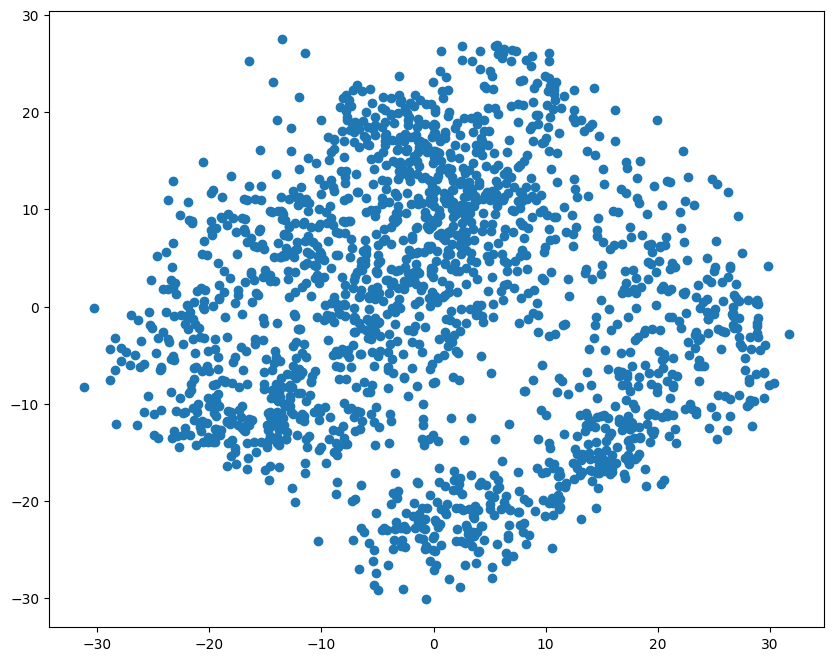

In [10]:
# 可视化降维后的结果
plt.figure(figsize=(10, 8))
plt.scatter(pca_data[:, 0], pca_data[:, 1])

In [11]:
# 使用BIRCH进行聚类
'''
sklearn.cluster.Birch(threshold=0.5, branching_factor=50, n_clusters=3, compute_labels=True, copy=True)
    threshold: 每个 CF 的空间阈值。参数值越小，则 CF 特征树的规模会越大，学习时花费的时间和内存会越多。默认值是 0.5，但如果样本的方差较大，则一般需要增大这个默认值
    branching_factor:  CF 树中所有节点的最大 CF 数。该参数默认为 50，如果样本量非常大，一般需要增大这个默认值
    n_clusters: 虽然层次聚类无需预先设定类别数量，但可以设定期望查询的类别数
'''
from sklearn.cluster import Birch

birch = Birch(n_clusters=10)
cluster_pca = birch.fit_predict(pca_data)
cluster_pca

array([3, 0, 0, ..., 0, 5, 9], shape=(1797,))

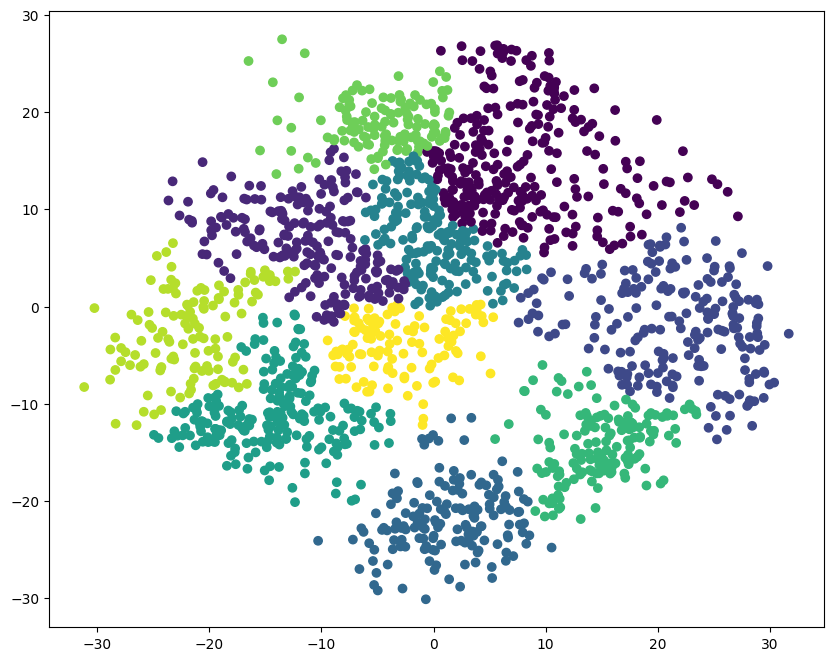

In [12]:
plt.figure(figsize=(10, 8))
plt.scatter(pca_data[:, 0], pca_data[:, 1], c=cluster_pca)

(-31.092205090486726, 28.494447547649756)

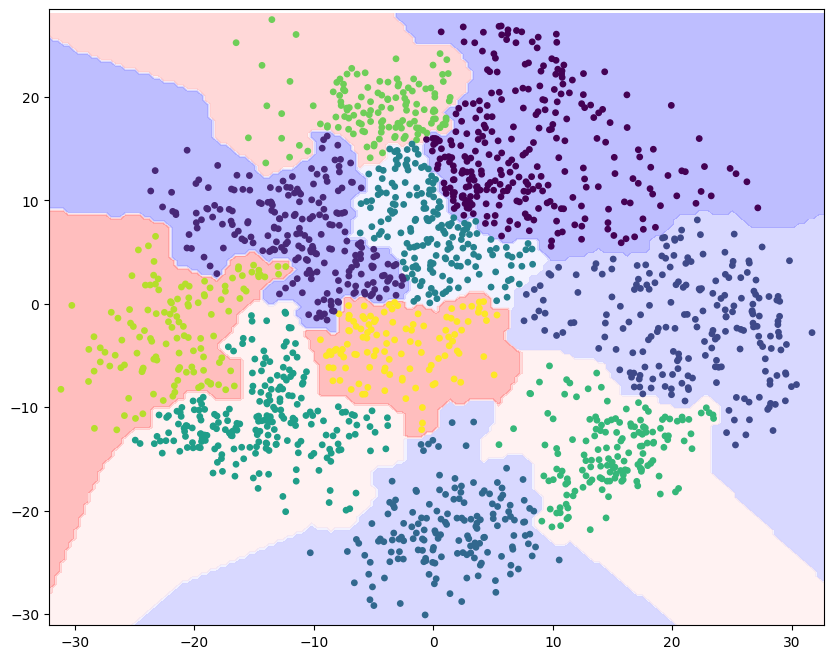

In [13]:
# 绘制各个类的决策边界
# 计算聚类过程中的决策边界
x_min, x_max = pca_data[:, 0].min() - 1, pca_data[:, 0].max() + 1
y_min, y_max = pca_data[:, 1].min() - 1, pca_data[:, 1].max() + 1

xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.4), np.arange(y_min, y_max, 0.4))
temp_cluster = birch.predict(np.c_[xx.ravel(), yy.ravel()])

# 将决策边界绘制出来
temp_cluster = temp_cluster.reshape(xx.shape)
plt.figure(figsize=(10, 8))
plt.contourf(xx, yy, temp_cluster, cmap=plt.cm.bwr, alpha=0.3)
plt.scatter(pca_data[:, 0], pca_data[:, 1], c=cluster_pca, s=15)

# 图像参数设置
plt.xlim(x_min, x_max)
plt.ylim(y_min, y_max)

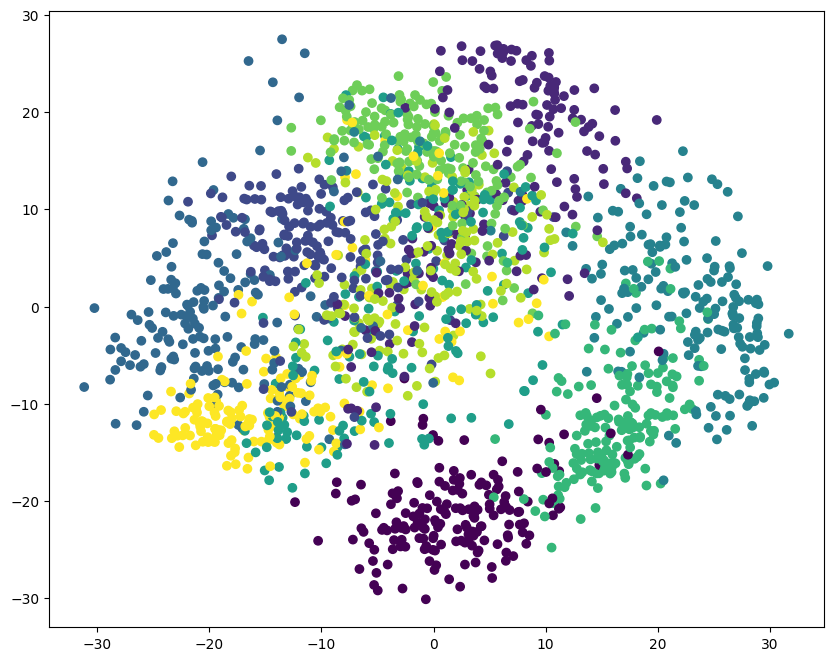

In [ ]:
# 实际的已知标签
plt.figure(figsize=(10, 8))
plt.scatter(pca_data[:, 0], pca_data[:, 1], c=digits.target)

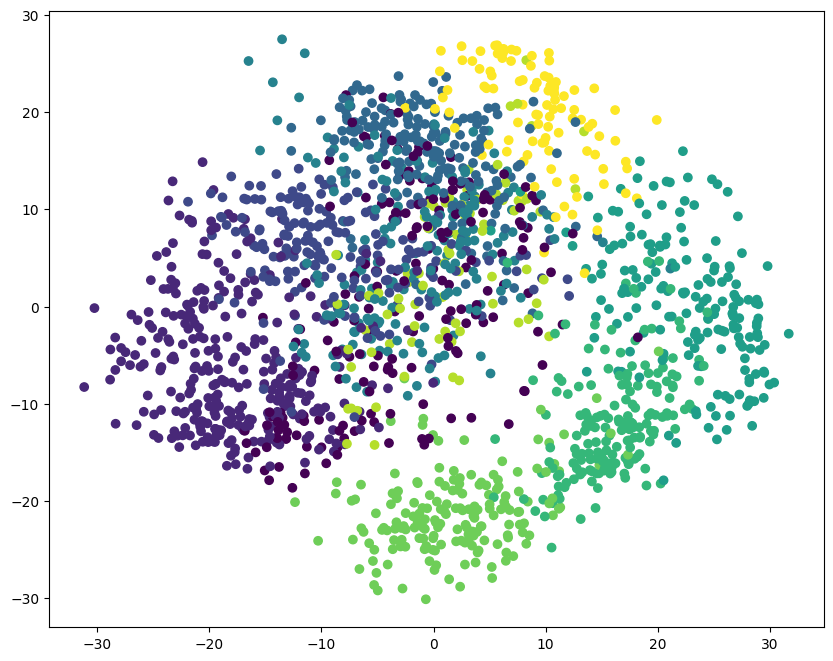

In [15]:
# 将原始数据重新进行聚类
cluster_ori = birch.fit_predict(digits.data)
plt.figure(figsize=(10, 8))
plt.scatter(pca_data[:, 0], pca_data[:, 1], c=cluster_ori)
